In [1]:
import pandas as pd # Manipulate DataFrame
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Visualization
import numpy as np # Data analysis Library
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore') 

%matplotlib inline
%config IPCompleter.greedy=True

# LOADING DATA

In [2]:
#Loadind the Data
studentData = pd.read_csv('Grades.csv', encoding='latin')
#survey.dropna(inplace = True) # Drops any NAN's
print(studentData.shape)
studentData.head()

(571, 43)


,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [3]:
studentData.dropna(inplace = True) # Drops any NAN's
print(studentData.shape)
#survey.head()

(417, 43)


In [4]:
studentData.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [5]:
df_train = pd.DataFrame()
df_train = studentData
#df_train = pd.DataFrame()
df_train.sort_index(inplace=True) # sort the dataframe index

In [6]:
df_train.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   417 non-null    object 
 1   PH-121     417 non-null    object 
 2   HS-101     417 non-null    object 
 3   CY-105     417 non-null    object 
 4   HS-105/12  417 non-null    object 
 5   MT-111     417 non-null    object 
 6   CS-105     417 non-null    object 
 7   CS-106     417 non-null    object 
 8   EL-102     417 non-null    object 
 9   EE-119     417 non-null    object 
 10  ME-107     417 non-null    object 
 11  CS-107     417 non-null    object 
 12  HS-205/20  417 non-null    object 
 13  MT-222     417 non-null    object 
 14  EE-222     417 non-null    object 
 15  MT-224     417 non-null    object 
 16  CS-210     417 non-null    object 
 17  CS-211     417 non-null    object 
 18  CS-203     417 non-null    object 
 19  CS-214     417 non-null    object 
 20  EE-217    

In [11]:
#find percentage of missing values for each column
missing_values = df_train.isnull().mean()*100

missing_values.sum()

0.0

In [12]:
# Number of distinct values in dataset variables
for i, column in enumerate(df_train.columns):
    print("{}. ".format(i) + str(column.title()) + ": {}". format(df_train[column].nunique()))

0. Seat No.: 417
1. Ph-121: 11
2. Hs-101: 11
3. Cy-105: 11
4. Hs-105/12: 11
5. Mt-111: 11
6. Cs-105: 11
7. Cs-106: 11
8. El-102: 11
9. Ee-119: 11
10. Me-107: 11
11. Cs-107: 11
12. Hs-205/20: 11
13. Mt-222: 11
14. Ee-222: 12
15. Mt-224: 12
16. Cs-210: 12
17. Cs-211: 11
18. Cs-203: 11
19. Cs-214: 11
20. Ee-217: 11
21. Cs-212: 11
22. Cs-215: 11
23. Mt-331: 11
24. Ef-303: 12
25. Hs-304: 12
26. Cs-301: 11
27. Cs-302: 11
28. Tc-383: 11
29. Mt-442: 11
30. El-332: 13
31. Cs-318: 13
32. Cs-306: 12
33. Cs-312: 12
34. Cs-317: 12
35. Cs-403: 11
36. Cs-421: 13
37. Cs-406: 13
38. Cs-414: 12
39. Cs-419: 12
40. Cs-423: 12
41. Cs-412: 13
42. Cgpa: 370


# DATA CLEANING

In [9]:
# ENG
df_train['PH-121'].unique()

array(['B-', 'A', 'D', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'A+'],
      dtype=object)

# FREQUENCY DISTRIBUTION

In [13]:
categorical = ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA']

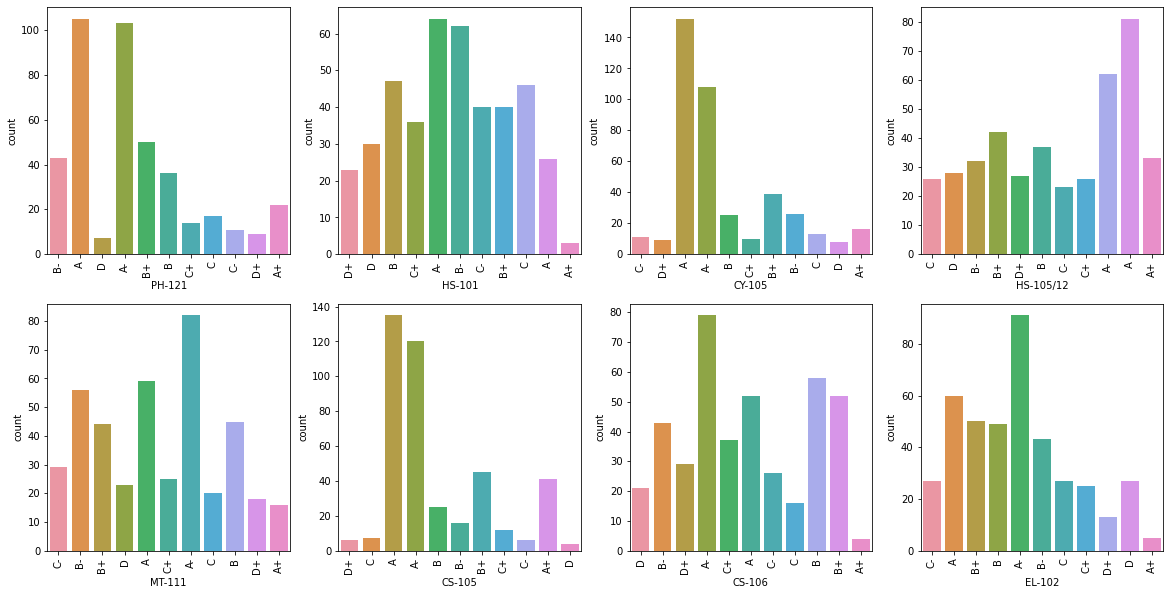

In [14]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df_train[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

# CORRELATION BETWEEN FEATURE

Text(0.5, 1.0, 'Cramer V Correlation between Variables')

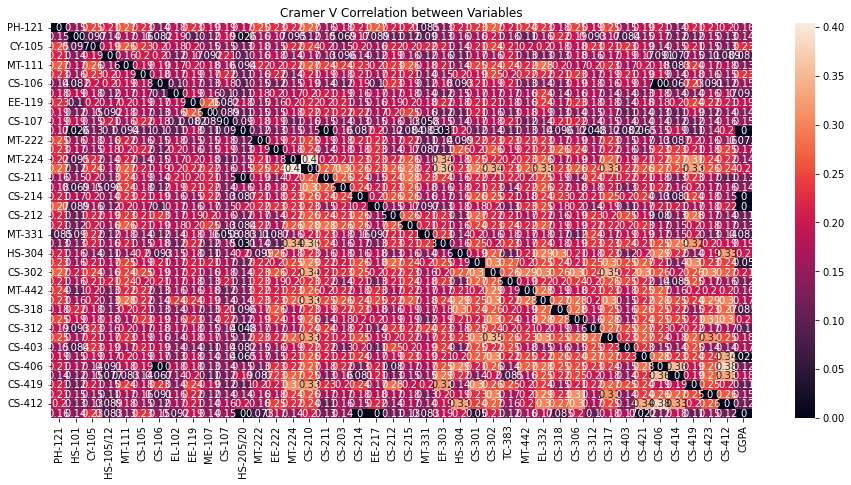

In [15]:
import itertools
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorical-categorical association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))


cols = ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA']
corrM = np.zeros((len(cols),len(cols)))
# there's probably a nice pandas way to do this
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(df_train[col1], df_train[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(15.7, 7.27))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables")

In [18]:
df_t =df_train[['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA']]

In [21]:
df_x = df_train[['Seat No.','PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', ]]
df_y = df_train['CGPA']

In [22]:
df_t

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [23]:
df_t.dropna(inplace=True)

In [24]:
df_t

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [25]:
df_y

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 417, dtype: float64

In [26]:
print("DF X")
print(df_x.head())
print("DF Y")
print(df_y.head())

DF X
   Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
0  CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
1  CS-97002      A      D     D+         D     B-      C      D      A     D+   
2  CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
3  CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
4  CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   

   ... CS-306 CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412  
0  ...      C     C-     C-     C-     C-     A-      A     C-      B     A-  
1  ...      D     D+      D      C      D     A-     B-      C      C      B  
2  ...     A-      B      B      A      C      A      A      A     A-      A  
3  ...     C-     D+      C     D+     C-     B-      B     C+     C+     C+  
4  ...     A-     B-     B+     B+     B-     A-      A     A-     A-      A  

[5 rows x 42 columns]
DF Y
0    2

In [27]:
df_x.tail()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,B+,A-,A-,A,A,A,B+,B+,B,A
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,A-,B+,B+,A,A,A-,B,A-,C,A-
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,B+,A-,B,A,B+,A,C,B+,A-,A-
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,B+,D,B,B,C-,D,C,B,B-,C
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,D+,C+,C,B-,D,F,C-,B+,D,C-


In [28]:
# drop Nan if any
df_x.dropna(inplace=True)
df_y.dropna(inplace=True)
df_t.dropna(inplace=True)

In [29]:
from sklearn import preprocessing

# Label encode the Predictor variables
for i in df_t.columns:
    print(i)
    le = preprocessing.LabelEncoder()
    df_t[i] = le.fit_transform(df_t[i])

PH-121
HS-101
CY-105
HS-105/12
MT-111
CS-105
CS-106
EL-102
EE-119
ME-107
CS-107
HS-205/20
MT-222
EE-222
MT-224
CS-210
CS-211
CS-203
CS-214
EE-217
CS-212
CS-215
MT-331
EF-303
HS-304
CS-301
CS-302
TC-383
MT-442
EL-332
CS-318
CS-306
CS-312
CS-317
CS-403
CS-421
CS-406
CS-414
CS-419
CS-423
CS-412
CGPA


In [30]:
df_t

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,10,8,6,8,10,9,8,5,8,...,8,8,8,8,2,0,8,3,2,45
1,0,9,10,9,5,6,9,0,10,9,...,10,9,6,9,2,5,6,6,3,27
2,0,3,0,5,4,0,5,4,2,2,...,3,3,0,6,0,0,0,2,0,309
3,9,7,10,9,9,2,10,8,9,7,...,10,6,10,8,5,3,7,7,7,18
4,2,2,2,4,0,0,2,4,0,2,...,5,4,4,5,2,0,2,2,0,271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,0,0,2,1,0,2,2,1,4,...,2,2,0,0,0,4,4,3,0,344
567,1,0,0,0,0,0,0,2,0,0,...,4,4,0,0,2,3,2,6,2,343
568,3,0,2,4,0,0,0,0,0,3,...,2,3,0,4,0,6,4,2,2,275
569,0,4,9,0,9,10,5,8,5,8,...,9,3,3,8,9,6,3,5,6,44


# DATA TRANSFORMATION

In [31]:
from sklearn import preprocessing

# Label encode the Predictor variables
for i in df_x.columns:
    print(i)
    le = preprocessing.LabelEncoder()
    df_x[i] = le.fit_transform(df_x[i])

Seat No.
PH-121
HS-101
CY-105
HS-105/12
MT-111
CS-105
CS-106
EL-102
EE-119
ME-107
CS-107
HS-205/20
MT-222
EE-222
MT-224
CS-210
CS-211
CS-203
CS-214
EE-217
CS-212
CS-215
MT-331
EF-303
HS-304
CS-301
CS-302
TC-383
MT-442
EL-332
CS-318
CS-306
CS-312
CS-317
CS-403
CS-421
CS-406
CS-414
CS-419
CS-423
CS-412


In [32]:
df_x.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,0,5,10,8,6,8,10,9,8,5,...,6,8,8,8,8,2,0,8,3,2
1,1,0,9,10,9,5,6,9,0,10,...,9,10,9,6,9,2,5,6,6,3
2,2,0,3,0,5,4,0,5,4,2,...,2,3,3,0,6,0,0,0,2,0
3,3,9,7,10,9,9,2,10,8,9,...,8,10,6,10,8,5,3,7,7,7
4,4,2,2,2,4,0,0,2,4,0,...,2,5,4,4,5,2,0,2,2,0


In [33]:
# One Hot Encoding
onehot_encoder = preprocessing.OneHotEncoder(sparse=True) # create a sparse matrix
onehot_encoded = onehot_encoder.fit_transform(df_x)
print(onehot_encoded)

  (0, 0)	1.0
  (0, 422)	1.0
  (0, 438)	1.0
  (0, 447)	1.0
  (0, 456)	1.0
  (0, 469)	1.0
  (0, 482)	1.0
  (0, 492)	1.0
  (0, 502)	1.0
  (0, 510)	1.0
  (0, 524)	1.0
  (0, 535)	1.0
  (0, 542)	1.0
  (0, 558)	1.0
  (0, 562)	1.0
  (0, 577)	1.0
  (0, 591)	1.0
  (0, 606)	1.0
  (0, 617)	1.0
  (0, 627)	1.0
  (0, 629)	1.0
  (0, 649)	1.0
  (0, 659)	1.0
  (0, 668)	1.0
  (0, 680)	1.0
  :	:
  (416, 604)	1.0
  (416, 610)	1.0
  (416, 628)	1.0
  (416, 637)	1.0
  (416, 646)	1.0
  (416, 661)	1.0
  (416, 668)	1.0
  (416, 681)	1.0
  (416, 695)	1.0
  (416, 706)	1.0
  (416, 717)	1.0
  (416, 725)	1.0
  (416, 732)	1.0
  (416, 752)	1.0
  (416, 762)	1.0
  (416, 777)	1.0
  (416, 786)	1.0
  (416, 797)	1.0
  (416, 808)	1.0
  (416, 823)	1.0
  (416, 838)	1.0
  (416, 848)	1.0
  (416, 856)	1.0
  (416, 873)	1.0
  (416, 884)	1.0


In [34]:
print("Shape of Sparse Matrix: ", onehot_encoded.shape)

Shape of Sparse Matrix:  (417, 889)


In [35]:
df_x.head() # Transformed Predictor Variable

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,0,5,10,8,6,8,10,9,8,5,...,6,8,8,8,8,2,0,8,3,2
1,1,0,9,10,9,5,6,9,0,10,...,9,10,9,6,9,2,5,6,6,3
2,2,0,3,0,5,4,0,5,4,2,...,2,3,3,0,6,0,0,0,2,0
3,3,9,7,10,9,9,2,10,8,9,...,8,10,6,10,8,5,3,7,7,7
4,4,2,2,2,4,0,0,2,4,0,...,2,5,4,4,5,2,0,2,2,0


In [36]:
# Label encode Target variables
le = preprocessing.LabelEncoder()
df_y = le.fit_transform(df_y)


print(le.classes_)

[1.708 1.714 1.719 1.749 1.753 1.763 1.764 1.768 1.787 1.805 1.806 1.845
 1.863 1.882 1.886 1.89  1.899 1.905 1.906 1.909 1.923 1.953 1.957 1.989
 1.992 1.993 1.996 2.008 2.009 2.011 2.028 2.035 2.042 2.053 2.056 2.06
 2.069 2.084 2.087 2.129 2.146 2.165 2.171 2.188 2.193 2.205 2.206 2.208
 2.212 2.228 2.246 2.253 2.254 2.264 2.288 2.294 2.298 2.3   2.311 2.328
 2.334 2.34  2.347 2.35  2.352 2.359 2.363 2.37  2.378 2.379 2.388 2.391
 2.394 2.396 2.406 2.407 2.408 2.414 2.424 2.429 2.44  2.442 2.444 2.462
 2.468 2.484 2.489 2.528 2.552 2.555 2.564 2.566 2.57  2.576 2.579 2.58
 2.595 2.602 2.603 2.605 2.607 2.608 2.612 2.619 2.621 2.631 2.634 2.644
 2.648 2.655 2.659 2.681 2.683 2.687 2.696 2.698 2.699 2.701 2.704 2.705
 2.706 2.711 2.715 2.717 2.737 2.749 2.756 2.76  2.763 2.768 2.776 2.777
 2.779 2.782 2.784 2.785 2.792 2.793 2.805 2.806 2.815 2.821 2.822 2.823
 2.828 2.845 2.851 2.854 2.857 2.86  2.861 2.87  2.88  2.891 2.895 2.917
 2.918 2.925 2.928 2.931 2.935 2.936 2.938 2.941 2.94

In [37]:
print(le.classes_)
df_y.shape

[1.708 1.714 1.719 1.749 1.753 1.763 1.764 1.768 1.787 1.805 1.806 1.845
 1.863 1.882 1.886 1.89  1.899 1.905 1.906 1.909 1.923 1.953 1.957 1.989
 1.992 1.993 1.996 2.008 2.009 2.011 2.028 2.035 2.042 2.053 2.056 2.06
 2.069 2.084 2.087 2.129 2.146 2.165 2.171 2.188 2.193 2.205 2.206 2.208
 2.212 2.228 2.246 2.253 2.254 2.264 2.288 2.294 2.298 2.3   2.311 2.328
 2.334 2.34  2.347 2.35  2.352 2.359 2.363 2.37  2.378 2.379 2.388 2.391
 2.394 2.396 2.406 2.407 2.408 2.414 2.424 2.429 2.44  2.442 2.444 2.462
 2.468 2.484 2.489 2.528 2.552 2.555 2.564 2.566 2.57  2.576 2.579 2.58
 2.595 2.602 2.603 2.605 2.607 2.608 2.612 2.619 2.621 2.631 2.634 2.644
 2.648 2.655 2.659 2.681 2.683 2.687 2.696 2.698 2.699 2.701 2.704 2.705
 2.706 2.711 2.715 2.717 2.737 2.749 2.756 2.76  2.763 2.768 2.776 2.777
 2.779 2.782 2.784 2.785 2.792 2.793 2.805 2.806 2.815 2.821 2.822 2.823
 2.828 2.845 2.851 2.854 2.857 2.86  2.861 2.87  2.88  2.891 2.895 2.917
 2.918 2.925 2.928 2.931 2.935 2.936 2.938 2.941 2.94

(417,)

In [38]:
df_y

array([ 45,  27, 309,  18, 271, 180, 170, 186, 254, 230, 111, 241, 136,
       291, 269, 131, 231,   8, 298, 281,  50, 169, 168, 305, 277,  49,
       268,  43, 216,  55, 269, 203, 223, 200, 206, 178, 207, 246,  41,
       322, 184, 114, 146, 190,  36,  26, 359, 351, 263,  52, 109, 197,
       137, 179, 175, 262,  16, 208,  92,  90,  84, 342, 174, 129, 142,
       214, 122, 301, 282, 138, 274,  61, 232, 112, 260, 242, 215, 314,
       140,  42, 339, 128, 162,  35,  68, 150,  66,  37,  15, 352,   9,
       363, 362, 234, 367,  73, 343,   7, 211, 248, 337, 218,  11, 365,
       216,  57, 338, 289,  38, 204,  29,  91, 174,  25, 247,  34,  88,
        30, 214,  95, 316, 158, 110, 210, 183,  47, 115, 143,  75,  69,
        94, 121,   1,   3,   0, 255,   5, 360, 355, 220,  98, 312, 257,
       288, 105, 256, 161,  98, 233, 317, 213, 201, 327, 235, 285, 297,
       225, 156, 312, 319, 228, 173, 229, 338,  63, 165,  72, 326, 236,
        87, 258, 187, 194, 125, 192, 331,  58, 172, 304,  33, 15

# CLASSIFICATION WITH DECISION TREE

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf_dt = DecisionTreeClassifier(max_depth=10)
clf_oh = DecisionTreeClassifier(max_depth=10)

In [40]:
print(clf_dt)

DecisionTreeClassifier(max_depth=10)


In [41]:
print(clf_oh)

DecisionTreeClassifier(max_depth=10)


# SPLITTING THE TRANSFORMED FEATURES TO TRAIN AND TEST SET

In [42]:
# split to training and test set
from sklearn.model_selection import train_test_split

# slpit data set: 20% test set
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=42)
X_train_oh, X_test_oh, y_train_oh, y_test_oh = train_test_split(onehot_encoded, df_y, test_size=0.3, random_state=42)

In [43]:
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (291, 42)
X_test Shape:  (126, 42)
y_train Shape:  (291,)
y_test Shape:  (126,)


In [44]:
print("X_train_oh Shape: ", X_train_oh.shape)
print("X_test_oh Shape: ", X_test_oh.shape)
print("y_train_oh Shape: ", y_train_oh.shape)
print("y_test_oh Shape: ", y_test_oh.shape)

X_train_oh Shape:  (291, 889)
X_test_oh Shape:  (126, 889)
y_train_oh Shape:  (291,)
y_test_oh Shape:  (126,)


In [45]:
# fit to Label encoded data
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [46]:
clf_oh.fit(X_train_oh, y_train_oh)

DecisionTreeClassifier(max_depth=10)

In [47]:
# split to training and test set
from sklearn.model_selection import train_test_split

# slpit data set: 30% test set
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=42)
X_train_oh, X_test_oh, y_train_oh, y_test_oh = train_test_split(onehot_encoded, df_y, test_size=0.3, random_state=42)

In [48]:
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (291, 42)
X_test Shape:  (126, 42)
y_train Shape:  (291,)
y_test Shape:  (126,)


In [49]:
print("X_train_oh Shape: ", X_train_oh.shape)
print("X_test_oh Shape: ", X_test_oh.shape)
print("y_train_oh Shape: ", y_train_oh.shape)
print("y_test_oh Shape: ", y_test_oh.shape)

X_train_oh Shape:  (291, 889)
X_test_oh Shape:  (126, 889)
y_train_oh Shape:  (291,)
y_test_oh Shape:  (126,)


In [50]:
# fit to Label encoded data
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [52]:
clf_oh.fit(X_train_oh, y_train_oh)

DecisionTreeClassifier(max_depth=10)

# CLASSIFICATION RESULTS FOR USING DECISION TREE

In [53]:
# Evaluate on test data set - Label Encoding
import time
import sys

pred = clf_dt.predict(X_test)
start = time.time()

score = clf_dt.score(X_test, y_test)


print("Accurancy:",round((score*100),2))
end = time.time()
print("Execution time for building the Tree is: %f"%(float(end)- float(start)),'S')
print("Size of Data set before feature selection: %.2f KB"%(sys.getsizeof (X_train)/(1000)))

Accurancy: 0.79
Execution time for building the Tree is: 0.000000 S
Size of Data set before feature selection: 51.23 KB


In [54]:
# Evaluate on test data set - One Hot Encoding
import time
import sys
pred_oh = clf_oh.predict(X_test_oh)
start = time.time()

score = clf_oh.score(X_test_oh, y_test_oh)
end = time.time()

print("Accurancy:",round((score*100),2))
print("Execution time for building the Tree is: %f"%(float(end)- float(start)),'S')
print("Size of Data set before feature selection: %.2f KB"%(sys.getsizeof (X_train)/(1000)))

Accurancy: 0.0
Execution time for building the Tree is: 0.001513 S
Size of Data set before feature selection: 51.23 KB


# CLASSIFICATION WITH RANDOM FOREST

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf_dt = RandomForestClassifier(n_estimators=10, max_depth = 3)
rf_oh = RandomForestClassifier(n_estimators=10, max_depth = 3)

print(rf_oh)

RandomForestClassifier(max_depth=3, n_estimators=10)


In [57]:
# fit to Label encoded data
rf_dt.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [58]:
clf_oh.fit(X_train_oh, y_train_oh)

DecisionTreeClassifier(max_depth=10)

In [59]:
#import time
#start = time.time()
#rf_dt.fit(X_train, y_train)

#end = time.time()

In [60]:
rf_oh.fit(X_train_oh, y_train_oh)

RandomForestClassifier(max_depth=3, n_estimators=10)

# CLASSIFICATION RESULTS WITH RANDOM FOREST

In [62]:
# Evaluate on test data set - One label Encoding
import time
import sys
start = time.time()
rf_dt.fit(X_train, y_train)



rf_pred_dt = rf_dt.predict(X_test)
end = time.time()
score = rf_dt.score(X_test, y_test)

print("Accurancy:",round((score*100),2))
print("Execution time for building the Tree is: %f"%(float(end)- float(start)),'S')
print("Size of Data set before feature selection: %.2f KB"%(sys.getsizeof (X_train)/(1000)))

Accurancy: 0.79
Execution time for building the Tree is: 0.064001 S
Size of Data set before feature selection: 51.23 KB


In [63]:
# Evaluate on test data set - One Hot Encoding
import time
import sys
start = time.time()

rf_pred_oh = rf_oh.predict(X_test_oh)
score = rf_oh.score(X_test_oh, y_test_oh)
end = time.time()

print("Accurancy:",round((score*100),2))
print("Execution time for building the Tree is: %f"%(float(end)- float(start)),'S')
print("Size of Data set before feature selection: %.2f KB"%(sys.getsizeof (X_train)/(1000)))

Accurancy: 0.0
Execution time for building the Tree is: 0.024005 S
Size of Data set before feature selection: 51.23 KB


In [64]:
# Evaluate on test data set with best prediction - Label Encoding
# Evaluate on test data set - One label Encoding
rf_pred_dt = rf_dt.predict(X_test)
score = rf_dt.score(X_test, y_test)
#print(score)
print("Predicted Label")
print (rf_pred_dt)

Predicted Label
[364  46   4 364 303 141 364 191 352 303 364 178  47 282 364 196 147  81
 178 143   0  47 364  81 364  33 282 178 364 178 154 282   0 178 364 364
  47  81 178 141 364 141 282  13 178 196   0  27 303 283 364 154 154 178
  47 280 107 178 343   0 178 364 178   0 352   0 269  13 178 282 364 178
 352 178 191 269   2 178 178 364   0  47 178 178 364 280   0 178 280 364
 271  69 364 303 107 269  60 196 343 271 282   0 178 178  13 178 107 178
  13   2 154  52 364 178 334  64 178 178   0 178 364 368 178  81 178 154]


In [65]:
print("True Label") 
print(y_test)

True Label
[327  65 100 367 274  44 341 126 322 262 340 253  46 269 311 222  29  83
 128 232  68 124 278  77 347   9 230 216 349 215  89 314  16 164 144 366
 112  80 200 343 336 344 342  21 131 115  25  45 281 221 332 165 217 256
  42 269  98  49 330  58 191 296  99 140 146  99 162  22 202 312 357 168
 359 155 167 209   6 208 183 277   8 122 236 203 348 284 159 234 295 297
 180  26  88 227 145 231  40 133 302  18 298  19  84 259  24 129 181 178
  74   1 178  58 268 186 249 126  38 218  62  55 360 321 214  97 247 190]


# CONFUSION MATRIX USING RESULT FROM DECISION TREE

In [66]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[nan nan nan ... nan nan nan]
 [ 1.  0.  0. ...  0.  0.  0.]
 [nan nan nan ... nan nan nan]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [nan nan nan ... nan nan nan]]


<AxesSubplot:title={'center':'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

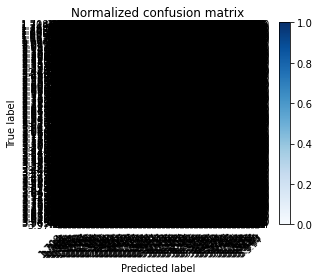

In [67]:
class_names = le.classes_

# Plot non-normalized confusion matrix
#plot_confusion_matrix(y_test, pred, classes=class_names,
  #                    title='Confusion matrix, without normalization')


# Plot normalized confusion matrix
plot_confusion_matrix(y_test, pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

In [68]:
#from sklearn.metrics import randomForest_report
from sklearn.metrics import classification_report, confusion_matrix

# 0 - pass, 1 - Second Class lower, 2 - Second Class Upper, 3 - Third Class
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         0
          29       0.00      0.00      0.00         1
          32       0.00    

Feature 1: 15904.308613
Feature 2: 652.228417
Feature 3: 434.887314
Feature 4: 749.529851
Feature 5: 717.855124
Feature 6: 551.773003
Feature 7: 661.802065
Feature 8: 582.597763
Feature 9: 541.222365
Feature 10: 438.542553
Feature 11: 582.575674
Feature 12: 738.192607
Feature 13: 480.111111
Feature 14: 653.817568
Feature 15: 694.616921
Feature 16: 558.128457
Feature 17: 632.769461
Feature 18: 541.034354
Feature 19: 603.412288
Feature 20: 501.048616
Feature 21: 529.674519
Feature 22: 489.674569
Feature 23: 523.223140
Feature 24: 707.436114
Feature 25: 372.398960
Feature 26: 481.514362
Feature 27: 510.617803
Feature 28: 474.950510
Feature 29: 553.024038
Feature 30: 678.737841
Feature 31: 488.510450
Feature 32: 500.613976
Feature 33: 524.262174
Feature 34: 517.334373
Feature 35: 452.114943
Feature 36: 720.998488
Feature 37: 335.370910
Feature 38: 608.082468
Feature 39: 589.467363
Feature 40: 442.370112
Feature 41: 435.871108
Feature 42: 538.882450


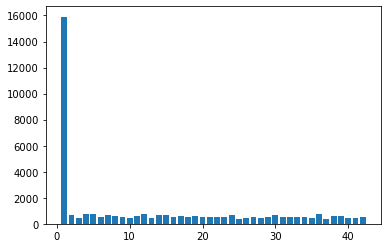

In [69]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k=6)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features

for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i+1, fs.scores_[i]))
# plot the scores
pyplot.bar([i+1 for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 0.00


# FEATURE SELECTION TO GET THE BEST FEATURES AND REMOVE REDUNDANT FEATURES